<a href="https://colab.research.google.com/github/charliemackie/Deep-Learning-Coursera/blob/master/Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step by Step Deep Neural Network - Charlie Mackie

Implementation of DNN functions for 2-layer and L-layer networks

Import necessary packages 







In [0]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # default photo size
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

DNN utils to be used (Activation Functions)

In [0]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache
 

In [0]:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [0]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [0]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

Assignment outline: 

(Will be making a 2-layer network and an L-layer network)

1. Initialize the parameters for a Deep 'L' Layer network

2. Implement the forward propagation Module

  - Linear portion to calculate Z[L]
  - Compute the ReLu of Z[L] = a[L]
  - Stack this piece and use a sigmoid activation at the final layer

3. Compute the Loss

4. Implement backward propagation

5. Update the paramaters (Optimization)

# Initialize Parameters

2-layer network: Initialize the parameters of our network (W and b)

In [0]:
def initialize_parameters(n_x, n_h, n_y):
  """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
  W1 = np.random.randn(n_h, n_x) * 0.01 # shape = (hidden units of layer 1, input layer units)
  b1 = np.zeros((n_h, 1)) # shape = (hidden units, 1)
  W2 = np.random.randn(n_y, n_h) * 0.01 # shape = (units of output layer, hidden units of layer 1)
  b2 = np.zeros((n_y,1)) # shape = (units of output layer, 1)

  # ensure the shapes are the right size 
  assert(W1.shape == (n_h, n_x))
  assert(b1.shape == (n_h, 1))
  assert(W2.shape == (n_y, n_h))
  assert(b2.shape == (n_y, 1))

  # store the parameters in a dictionary that can be easily accessed
  parameters = {"W1" : W1,
                "b1" : b1,
                "W2" : W2,
                "b2" : b2,}

  return parameters


In [0]:
# test case
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.0053004   0.0040213  -0.00188167]
 [ 0.00387259 -0.00817396  0.00242415]]
b1 = [[0.]
 [0.]]
W2 = [[0.00168808 0.00092437]]
b2 = [[0.]]


L-layer network: initialize parameters

  - need to ensure that we have the right sized matricies for linear forward prop
  - Python will broadcast our b value 


In [0]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    parameters = {}
    L = len(layer_dims)

    for l in range(1,L):
      parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])
      parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
      
      # assert shapes 
      assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
      assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    
    return parameters

In [0]:
# test case
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.19945411  0.43036863 -1.84990859 -0.26587459 -1.11555909]
 [ 0.00893857  0.72543373  0.33715813 -0.02690619 -1.34955181]
 [ 0.30319862  1.83884901 -0.03927289 -2.66154231  0.78309335]
 [-1.37364701  1.4917113  -0.12029932  1.44032285 -0.00421307]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.38632681  0.93274408  1.20165047  0.38819642]
 [ 1.40203533 -0.02939617 -1.16571705  1.7339532 ]
 [ 0.93033679 -0.52792869 -2.15863711 -0.19076963]]
b2 = [[0.]
 [0.]
 [0.]]


# Forward Propagation

2-layer network: Linear Forward 

In [0]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    # Forward pass
    Z = np.dot(W,A) + b

    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

In [0]:
# test case
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 2.21141706 -1.36463312]]


2-layer network: Linear Activation

In [0]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    if activation == "sigmoid":
      Z, linear_cache = linear_forward(A_prev, W , b)
      A, activation_cache = sigmoid(Z)

    if activation == 'relu':
      Z, linear_cache = linear_forward(A_prev, W , b)
      A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [0]:
# test case 
A_prev = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.45891306 0.02786052]]
With ReLU: A = [[0. 0.]]


L-layer network: forward linear + activation


In [0]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """
    caches = []
    A = X
    L = len(parameters) //2

    # Linear -> Relu
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], activation = "relu")
        caches.append(cache)

    # Linear -> Sigmoid
    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation = "sigmoid")
    caches.append(cache)

    return AL, caches

In [0]:
# test case

X = np.random.randn(5,4)
W1 = np.random.randn(4,5)
b1 = np.random.randn(4,1)
W2 = np.random.randn(3,4)
b2 = np.random.randn(3,1)
W3 = np.random.randn(1,3)
b3 = np.random.randn(1,1)

parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
              
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))


AL = [[0.23196871 0.98007404 0.54577147 0.30385374]]
Length of caches list = 3


# Cost Function

Using cross entropy loss equation

In [0]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    # number of training examples
    m = Y.shape[1]
    # cost function
    cost = -1./m * np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    # this turns [['size']] into 'size'
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

In [0]:
# test case
Y = np.asarray([[1, 1, 0]])
AL = np.array([[.8,.9,0.4]])
print("cost = " + str(compute_cost(AL, Y)))

cost = 0.2797765635793422


# Backward Propagation

2-layer network: linear backward

In [0]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    # Calculate gradients
    dW = 1./m * np.dot(dZ, A_prev.T)
    db = 1./m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    # Asseert shapes
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [0]:
# test case
np.random.seed(1)
dZ = np.random.randn(3,4)
A = np.random.randn(5,4)
W = np.random.randn(3,5)
b = np.random.randn(3,1)
linear_cache = (A, W, b)

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]


2-layer network: linear activation

In [0]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [0]:
# test case
np.random.seed(2)
dAL = np.random.randn(1,2)
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
Z = np.random.randn(1,2)
linear_cache = (A, W, b)
activation_cache = Z
linear_activation_cache = (linear_cache, activation_cache)

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


L-layer model: backward linear + activation

  - output -> Sigmoid -> Linear -> [RELU -> Linear (repeated)]
  - find dAL from output of forward prop
  - find dA, dW, dB for sigmoid layer
  - repeat: find dA, dW, dB for RELU layer
  - store all gradients in a dictionary for parameter updating
  

In [0]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """

    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)

    # first step
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Lth Layer: sigmoid
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")

    # Loop for RELU -> Linear
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [0]:
# test case
np.random.seed(3)
AL = np.random.randn(1, 2)
Y_assess = np.array([[1, 0]])

A1 = np.random.randn(4,2)
W1 = np.random.randn(3,4)
b1 = np.random.randn(3,1)
Z1 = np.random.randn(3,2)
linear_cache_activation_1 = ((A1, W1, b1), Z1)

A2 = np.random.randn(3,2)
W2 = np.random.randn(1,3)
b2 = np.random.randn(1,1)
Z2 = np.random.randn(1,2)
linear_cache_activation_2 = ((A2, W2, b2), Z2)

caches = (linear_cache_activation_1, linear_cache_activation_2)

grads = L_model_backward(AL, Y_assess, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"])) 

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


# Update Paramaters

In [0]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    L = len(parameters) // 2 

    # update parameters
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]

    return parameters

In [0]:
# test case
np.random.seed(2)
W1 = np.random.randn(3,4)
b1 = np.random.randn(3,1)
W2 = np.random.randn(1,3)
b2 = np.random.randn(1,1)
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
np.random.seed(3)
dW1 = np.random.randn(3,4)
db1 = np.random.randn(3,1)
dW2 = np.random.randn(1,3)
db2 = np.random.randn(1,1)
grads = {"dW1": dW1,
          "db1": db1,
          "dW2": dW2,
          "db2": db2}
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


# Image Classification Application

Implementing 2-layer network to classify images

Dataset: Cat vs. Non-Cat

Provided with a data file 'data.h5' which contains:

  - training set of m images that are labelled as cat or non-cat
  - test set of images
  - images are of shape: (pixels, pixels, 3) - 3 channels for RGB
  

In [0]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def load_data():
    train_dataset = h5py.File('/content/drive/My Drive/Deep Learning Coursera/Deep Neural Net - Cat Classifier/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/drive/My Drive/Deep Learning Coursera/Deep Neural Net - Cat Classifier/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


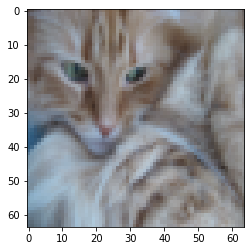

In [0]:
# Example of a picture
index = 2
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [0]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [0]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


Process to implement:

  - Initialize parameters
  - Loop for num_iterations
    
    - Forward Prop.
    - Compute Cost
    - Backward Prop.
    - Update parameters.
  
  - Use trained parameters to predict labels

2-layer Model:

In [0]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7 # hidden layers
n_y = 1 # output node
layers_dims = (n_x, n_h, n_y)

In [0]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """

    grads = {}
    costs = [] # to keep track of the cost
    m = X.shape[1] # number of examples
    (n_x, n_h, n_y) = layers_dims

    # use previous initialization fucntion
    parameters = initialize_parameters(n_x, n_h, n_y)

    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6936890276336564
Cost after iteration 100: 0.6479551712905036
Cost after iteration 200: 0.6356911521977447
Cost after iteration 300: 0.6080457268786562
Cost after iteration 400: 0.5672335207560901
Cost after iteration 500: 0.5255545368934091
Cost after iteration 600: 0.4784230698515129
Cost after iteration 700: 0.4201501902223851
Cost after iteration 800: 0.39248973788351843
Cost after iteration 900: 0.37904885764520413
Cost after iteration 1000: 0.32985401173003703
Cost after iteration 1100: 0.2948202517059938
Cost after iteration 1200: 0.2483400112556411
Cost after iteration 1300: 0.20169021751691749
Cost after iteration 1400: 0.16989855048521438
Cost after iteration 1500: 0.1353840213002415
Cost after iteration 1600: 0.12087036266509116
Cost after iteration 1700: 0.10374776808455388
Cost after iteration 1800: 0.08625078735516983
Cost after iteration 1900: 0.07387471899033579
Cost after iteration 2000: 0.0630233487345374
Cost after iteration 2100: 0.05561893

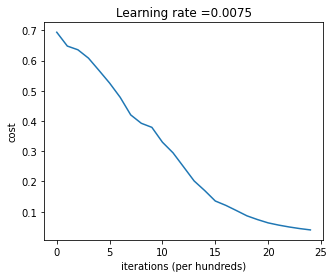

In [0]:
# test case
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

2-layer Model: Prediction method

  - computing a forward pass (AL and cache) 
  - using the sigmoid outputs of AL to determine predictions
  - iterate through all of AL.shape[1] and push results to 1 OR 0
  - sum how many times p == y and divide by training examples 'm'

In [0]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [0]:
# test the predict method on our model (Training data)
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [0]:
# test the predict method on our model (Testing data)
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.66
